In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load the dataset

In [2]:
df = pd.read_csv('spotify_dataset.csv')

#Drop the unnamed files
df.drop("Unnamed: 0", axis=1, inplace=True)
print(df.head())

     artist_name        track_name                track_id  popularity  year  \
0     Jason Mraz   I Won't Give Up  53QF56cjZA9RTuuMZDrSA6          68  2012   
1     Jason Mraz  93 Million Miles  1s8tP3jP4GZcyHDsjvw218          50  2012   
2  Joshua Hyslop  Do Not Let Me Go  7BRCa8MPiyuvr2VU3O9W0F          57  2012   
3   Boyce Avenue          Fast Car  63wsZUhUZLlh1OsyrZq7sz          58  2012   
4   Andrew Belle  Sky's Still Blue  6nXIYClvJAfi6ujLiKqEq8          54  2012   

      genre  danceability  energy  key  loudness  mode  speechiness  \
0  acoustic         0.483   0.303    4   -10.058     1       0.0429   
1  acoustic         0.572   0.454    3   -10.286     1       0.0258   
2  acoustic         0.409   0.234    3   -13.711     1       0.0323   
3  acoustic         0.392   0.251   10    -9.845     1       0.0363   
4  acoustic         0.430   0.791    6    -5.419     0       0.0302   

   acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
0        0.694

### Using a Heat Map to display correlation between multiple song plots

In [3]:
# Filter out non-numeric columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])

In [4]:
# Calculate the correlation matrix on numeric data
correlation_matrix = df_numeric.corr()

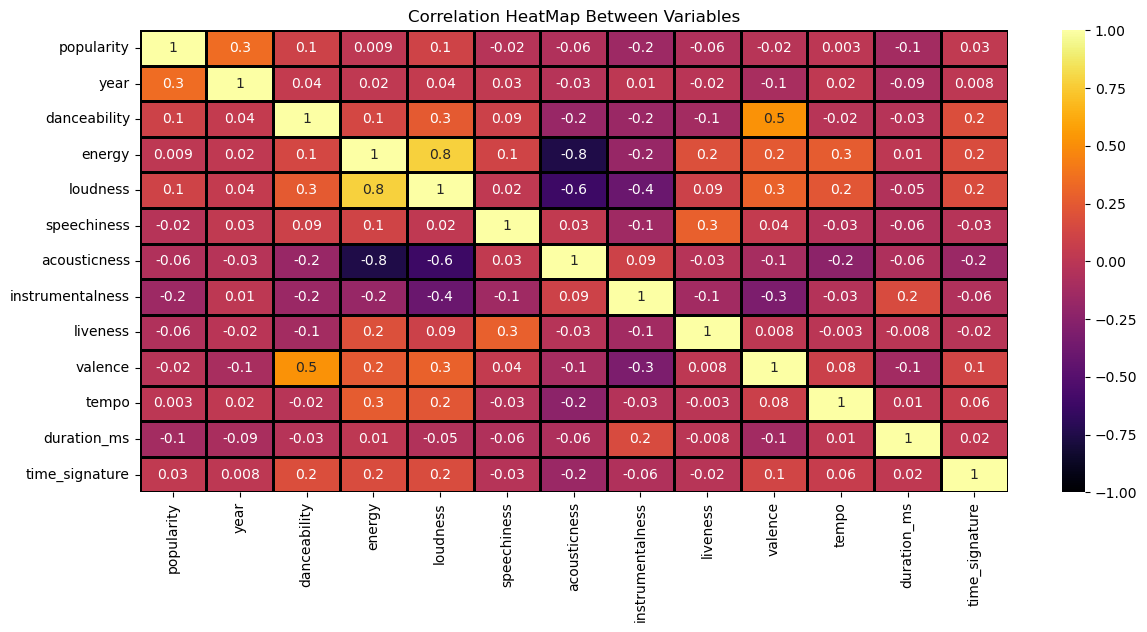

In [5]:
# Drop "key" and "mode" columns and calculate the correlation matrix
corr_df = df.drop(["key", "mode"], axis=1).select_dtypes(include=['float64', 'int64']).corr(method="pearson")

plt.figure(figsize=(14,6))
heatmap = sns.heatmap(corr_df, annot=True, fmt=".1g", vmin=-1, vmax=1, center=0, cmap="inferno", linewidths=1, linecolor="black")

# Rotate x-axis labels for better readability
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)

#Title the heat map 
heatmap.set_title("Correlation HeatMap Between Variables")

#Display the plot
plt.show()

### Identifying the listener's behavior by year

In [6]:
# Check the columns in the DataFrame
print(df.columns)

# Convert duration from milliseconds to minutes (if necessary)
df['duration_min'] = df['duration_ms'] / 60000  # Convert to minutes

# Group by year and calculate the average duration
duration_by_year = df.groupby('year')['duration_min'].mean().reset_index()

Index(['artist_name', 'track_name', 'track_id', 'popularity', 'year', 'genre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature'],
      dtype='object')


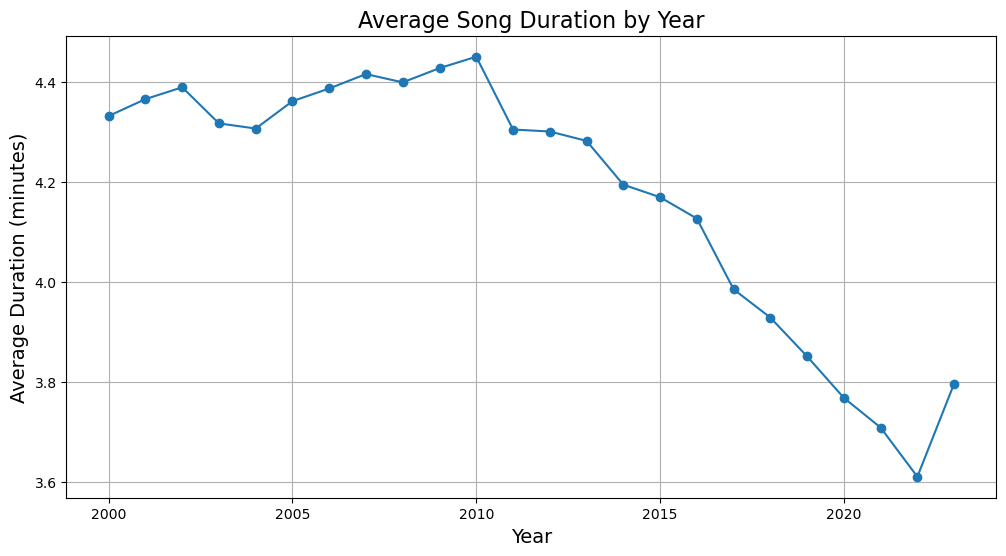

In [7]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the data
plt.plot(duration_by_year['year'], duration_by_year['duration_min'], marker='o')

# Add labels and title
plt.title('Average Song Duration by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Duration (minutes)', fontsize=14)

# Show grid
plt.grid()

# Display the plot
plt.show()

### Identifying the listener's interaction with music by year

In [8]:
# Display the first few rows and the columns of the DataFrame
print(df.head())
print(df.columns)

     artist_name        track_name                track_id  popularity  year  \
0     Jason Mraz   I Won't Give Up  53QF56cjZA9RTuuMZDrSA6          68  2012   
1     Jason Mraz  93 Million Miles  1s8tP3jP4GZcyHDsjvw218          50  2012   
2  Joshua Hyslop  Do Not Let Me Go  7BRCa8MPiyuvr2VU3O9W0F          57  2012   
3   Boyce Avenue          Fast Car  63wsZUhUZLlh1OsyrZq7sz          58  2012   
4   Andrew Belle  Sky's Still Blue  6nXIYClvJAfi6ujLiKqEq8          54  2012   

      genre  danceability  energy  key  loudness  mode  speechiness  \
0  acoustic         0.483   0.303    4   -10.058     1       0.0429   
1  acoustic         0.572   0.454    3   -10.286     1       0.0258   
2  acoustic         0.409   0.234    3   -13.711     1       0.0323   
3  acoustic         0.392   0.251   10    -9.845     1       0.0363   
4  acoustic         0.430   0.791    6    -5.419     0       0.0302   

   acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
0        0.694

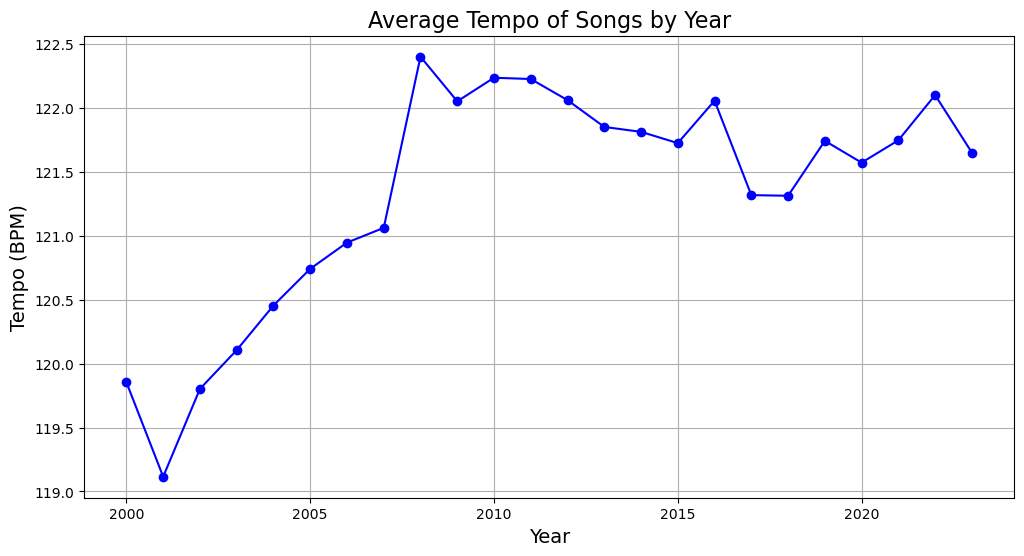

In [9]:

# Set the figure size
plt.figure(figsize=(12, 6))

# Group data by year and calculate the mean tempo per year
tempo_by_year = df.groupby('year')['tempo'].mean().reset_index()

# Create a line plot
plt.plot(tempo_by_year['year'], tempo_by_year['tempo'], marker='o', linestyle='-', color='b')

# Add title and labels
plt.title('Average Tempo of Songs by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Tempo (BPM)', fontsize=14)

# Add grid
plt.grid(True)

# Show the plot
plt.show()

### Comparing correlation between different song features by year

In [10]:
# Display the columns of the DataFrame
print(df.columns)

Index(['artist_name', 'track_name', 'track_id', 'popularity', 'year', 'genre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'duration_min'],
      dtype='object')


In [11]:
# Display the first few rows and the columns of the DataFrame
print(df.head())
print(df.columns)

     artist_name        track_name                track_id  popularity  year  \
0     Jason Mraz   I Won't Give Up  53QF56cjZA9RTuuMZDrSA6          68  2012   
1     Jason Mraz  93 Million Miles  1s8tP3jP4GZcyHDsjvw218          50  2012   
2  Joshua Hyslop  Do Not Let Me Go  7BRCa8MPiyuvr2VU3O9W0F          57  2012   
3   Boyce Avenue          Fast Car  63wsZUhUZLlh1OsyrZq7sz          58  2012   
4   Andrew Belle  Sky's Still Blue  6nXIYClvJAfi6ujLiKqEq8          54  2012   

      genre  danceability  energy  key  loudness  mode  speechiness  \
0  acoustic         0.483   0.303    4   -10.058     1       0.0429   
1  acoustic         0.572   0.454    3   -10.286     1       0.0258   
2  acoustic         0.409   0.234    3   -13.711     1       0.0323   
3  acoustic         0.392   0.251   10    -9.845     1       0.0363   
4  acoustic         0.430   0.791    6    -5.419     0       0.0302   

   acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
0        0.694

In [12]:
#Create a sample dataframe
sample_df = df.sample(int(0.004*len(df)))
print(len(sample_df))

4639


[Text(0.5, 1.0, 'Tempo vs Popularity correlation')]

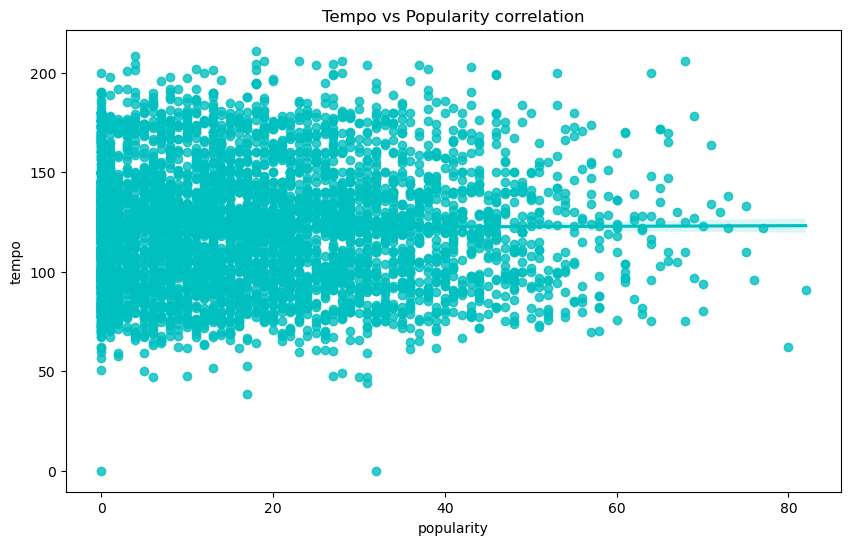

In [13]:
# Plot the correlation between Tempo and Popularity
plt.figure(figsize=(10,6))
sns.regplot(data=sample_df, y= "tempo", x = "popularity", color = "c").set(title = "Tempo vs Popularity correlation")

[Text(0.5, 1.0, 'Loudness vs Energy correlation')]

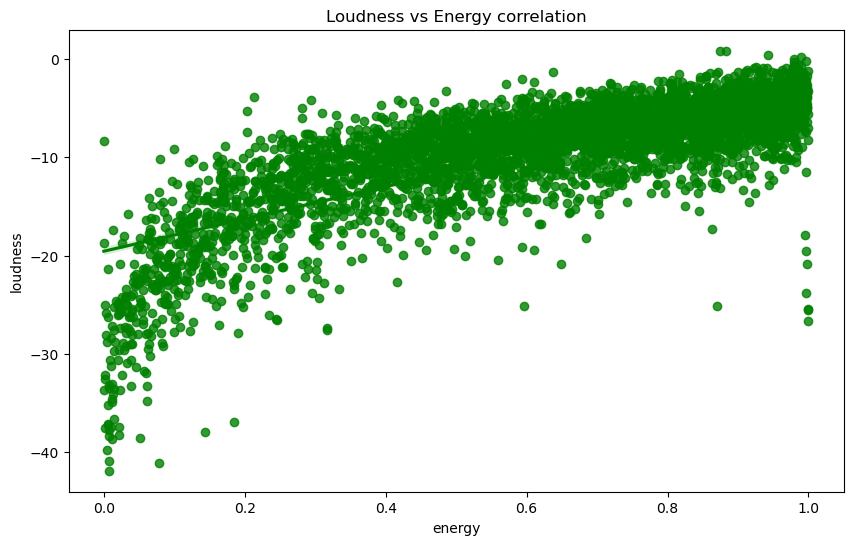

In [14]:
# Plot the correlation between Loudness and Energy 
plt.figure(figsize=(10,6))
sns.regplot(data=sample_df, y= "loudness", x = "energy", color = "g").set(title = "Loudness vs Energy correlation")

[Text(0.5, 1.0, 'Acounsticness vs Popularity correlation')]

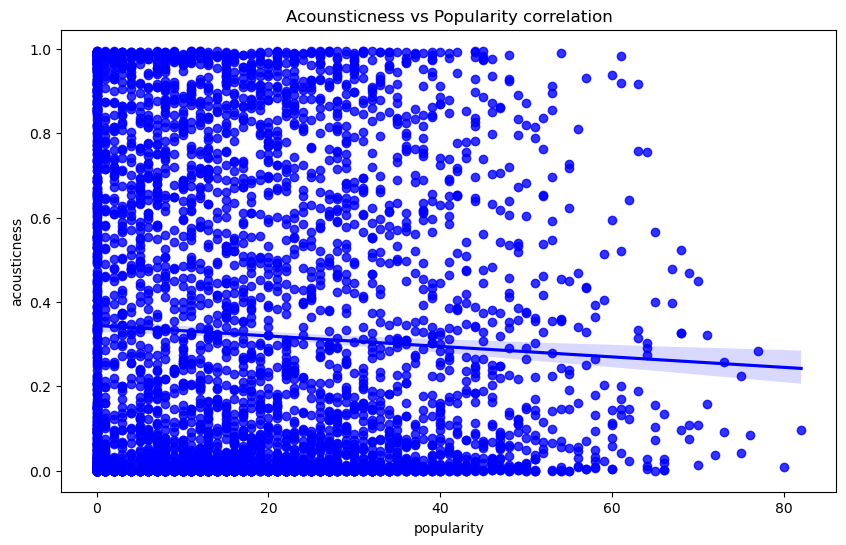

In [15]:
# Plot the correlation between Acousticness and Popularity
plt.figure(figsize=(10,6))
sns.regplot(data=sample_df, y= "acousticness", x = "popularity", color = "b").set(title = "Acounsticness vs Popularity correlation")

In [16]:

# Filter the data to include only rows from 2023
df_2023 = df.loc[df['year'] == 2023]

In [17]:

# Take a random sample from the 2023 data
sample_df = df_2023.sample(int(0.004 * len(df_2023)))
print(len(sample_df))

154


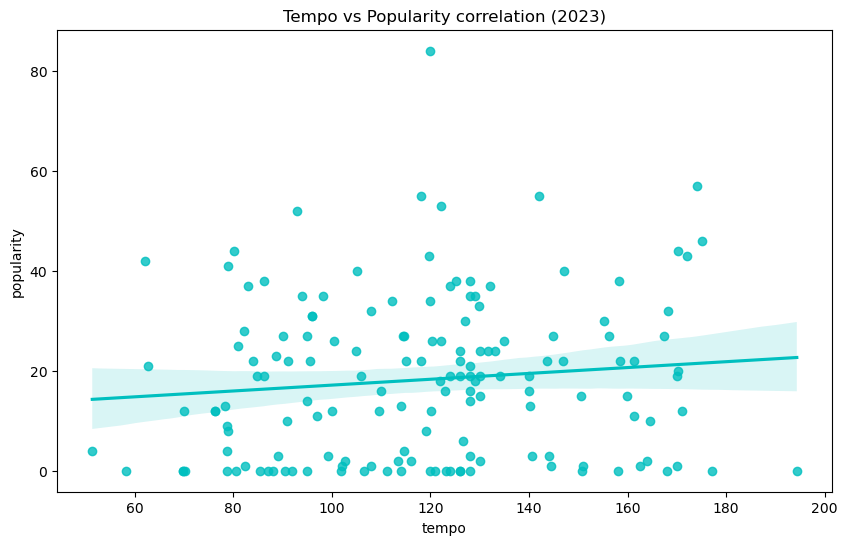

In [18]:
# Plot the correlation between Tempo and Popularity for 2023
plt.figure(figsize=(10, 6))
sns.regplot(data=sample_df, x='tempo', y='popularity', color='c').set(title="Tempo vs Popularity correlation (2023)")

plt.show()

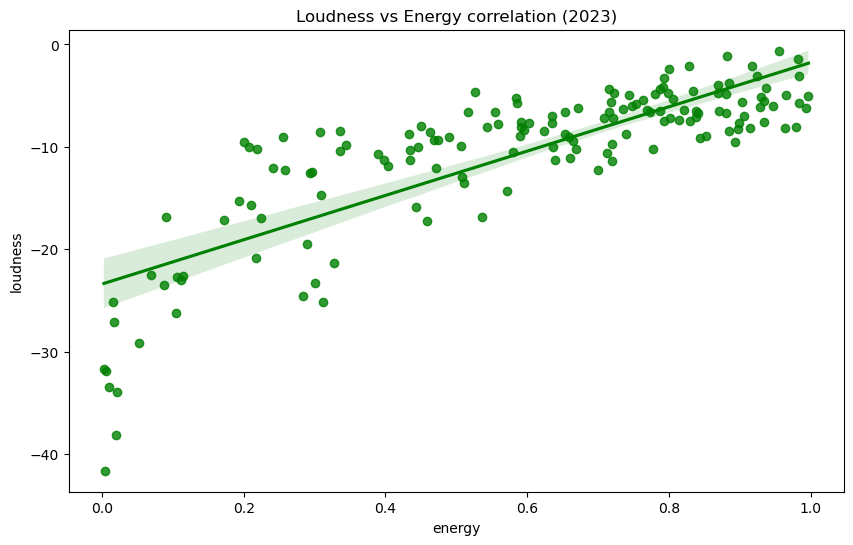

In [19]:
# Plot the correlation between Loudness and Energy for 2023
plt.figure(figsize=(10, 6))
sns.regplot(data=sample_df, x='energy', y='loudness', color='g').set(title="Loudness vs Energy correlation (2023)")

plt.show()

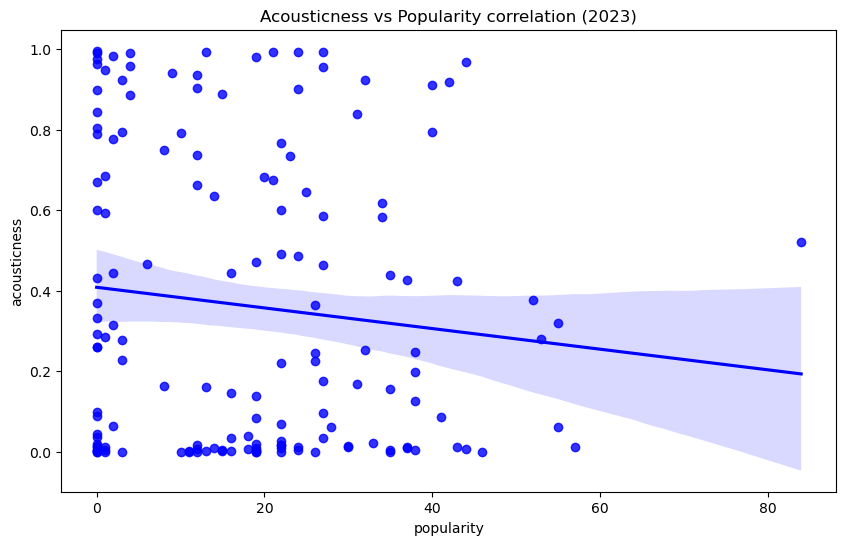

In [20]:
# Plot the correlation between Acousticness and Popularity for 2023
plt.figure(figsize=(10, 6))
sns.regplot(data=sample_df, x='popularity', y='acousticness', color='b').set(title="Acousticness vs Popularity correlation (2023)")

plt.show()